In [122]:
#Import dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from datetime import datetime


In [123]:
#Set path of input file
file_path = "Resources/US_Salary_Cleaned.csv"
#Read input file into a DataFrame
salaries_df = pd.read_csv(file_path)
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44719,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
44720,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44721,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [124]:
#try linear model on subsets by job title
salaries_df['title'].unique()

array(['Product Manager', 'Software Engineer',
       'Software Engineering Manager', 'Data Scientist',
       'Solution Architect', 'Technical Program Manager',
       'Human Resources', 'Product Designer', 'Marketing',
       'Business Analyst', 'Hardware Engineer', 'Recruiter',
       'Mechanical Engineer', 'Sales', 'Management Consultant'],
      dtype=object)

In [125]:
software_engineer_df = salaries_df.loc[salaries_df['title']=='Software Engineer']
data_scientist_df = salaries_df.loc[salaries_df['title']=='Data Scientist']
business_analyst_df = salaries_df.loc[salaries_df['title']=='Business Analyst']
print(len(software_engineer_df), len(data_scientist_df))

29776 1980


In [126]:
def simple_regression(df):
    # The data in the df column must be reshaped into an array with shape (num_samples, num_features)
    X = df.yearsofexperience.values.reshape(-1, 1)
    y = df.totalyearlycompensation
    # Create a model with scikit-learn
    model = LinearRegression()
    # Fit the data into the model
    model.fit(X, y)
    # The model creates predicted y values based on X values
    y_pred = model.predict(X)
    #corr_coef = np.corrcoef(X,df.basesalary)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel('Years of Experience')
    plt.ylabel('Total Yearly Compensation in USD')
    plt.show()
    print(f"The slope is {model.coef_}")
    print(f"The intercept is {model.intercept_}")
    X = df.yearsofexperience
    y = df.totalyearlycompensation
    slope, intercept, r, p, std_err  = stats.linregress(X, y)
    print(f"The correlation coefficient is {r}")
    
def simple_regression_base(df):
     # The data in the df column must be reshaped into an array with shape (num_samples, num_features)
    X = df.yearsofexperience.values.reshape(-1, 1)
    y = df.basesalary
    # Create a model with scikit-learn
    model = LinearRegression()
    # Fit the data into the model
    model.fit(X, y)
    # The model creates predicted y values based on X values
    y_pred = model.predict(X)
    #corr_coef = np.corrcoef(X,df.basesalary)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel('Years of Experience')
    plt.ylabel('Total Yearly Compensation in USD')
    plt.show()
    print(f"The slope is {model.coef_}")
    print(f"The intercept is {model.intercept_}")
    X = df.yearsofexperience
    y = df.basesalary
    slope, intercept, r, p, std_err  = stats.linregress(X, y)
    print(f"The correlation coefficient is {r}")
    return X,y,y_pred, slope, intercept

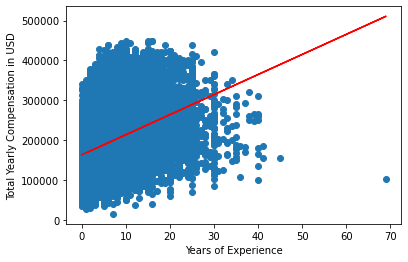

The slope is [5040.07989279]
The intercept is 163190.93036726242
The correlation coefficient is 0.39883154620568173


In [127]:
#Regression for all data on total salary
simple_regression(salaries_df)

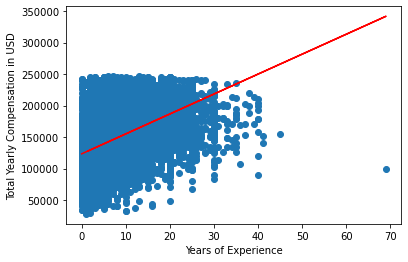

The slope is [3166.59013187]
The intercept is 123414.11553261594
The correlation coefficient is 0.5039667114218729


(0         1.5
 1         5.0
 2         8.0
 3         5.0
 4         8.5
          ... 
 44718    10.0
 44719     2.0
 44720    14.0
 44721     8.0
 44722     0.0
 Name: yearsofexperience, Length: 44723, dtype: float64,
 0        107000
 1        100000
 2        155000
 3        157000
 4        208000
           ...  
 44718    155000
 44719    146900
 44720    157000
 44721    194688
 44722    155000
 Name: basesalary, Length: 44723, dtype: int64,
 array([128164.00073042, 139247.06619196, 148746.83658757, ...,
        167746.37737879, 148746.83658757, 123414.11553262]),
 3166.5901318696447,
 123414.11553261585)

In [128]:
#Regression for all data on base salary
simple_regression_base(salaries_df)

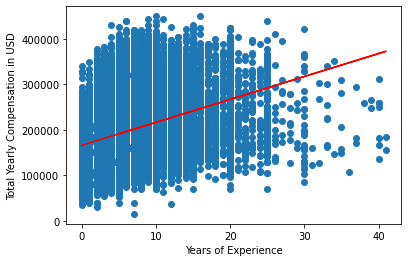

The slope is [5047.04373656]
The intercept is 166009.59923602414
The correlation coefficient is 0.37404629670539263


In [129]:
#regression for software engineers total salary
simple_regression(software_engineer_df)

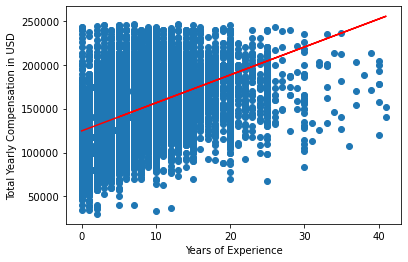

The slope is [3187.36030631]
The intercept is 124660.14690596002
The correlation coefficient is 0.4887546772470766


(1         5.0
 3         5.0
 4         8.5
 6         4.0
 7         3.0
          ... 
 44718    10.0
 44719     2.0
 44720    14.0
 44721     8.0
 44722     0.0
 Name: yearsofexperience, Length: 29776, dtype: float64,
 1        100000
 3        157000
 4        208000
 6        135000
 7        120000
           ...  
 44718    155000
 44719    146900
 44720    157000
 44721    194688
 44722    155000
 Name: basesalary, Length: 29776, dtype: int64,
 array([140596.94843752, 140596.94843752, 151752.70950962, ...,
        169283.19119433, 150159.02935646, 124660.14690596]),
 3187.360306312406,
 124660.14690596005)

In [130]:
#regression for software engineers base salary
simple_regression_base(software_engineer_df)

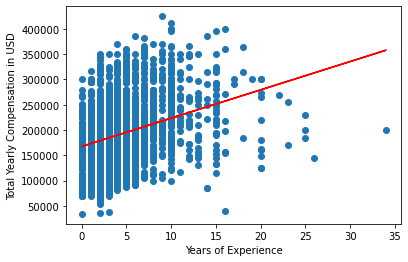

The slope is [5600.14294842]
The intercept is 167457.9147951533
The correlation coefficient is 0.32987014174938395


In [131]:
#regression for data scientist total salary
simple_regression(data_scientist_df)

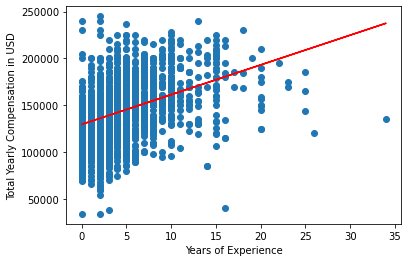

The slope is [3175.64506879]
The intercept is 129564.33287149516
The correlation coefficient is 0.38543717278447914


(297      11.0
 301      10.0
 330       8.0
 340      11.0
 347       8.0
          ... 
 44336     5.0
 44425     3.0
 44431     5.0
 44466     8.0
 44705     6.0
 Name: yearsofexperience, Length: 1980, dtype: float64,
 297      165000
 301      180000
 330      190000
 340      200000
 347      118000
           ...  
 44336    130000
 44425    160000
 44431    141000
 44466    150000
 44705    135000
 Name: basesalary, Length: 1980, dtype: int64,
 array([164496.42862823, 161320.78355943, 154969.49342185, ...,
        145442.55821546, 154969.49342185, 148618.20328426]),
 3175.645068793929,
 129564.33287149516)

In [132]:
#regression for data scientist base salary
simple_regression_base(data_scientist_df)

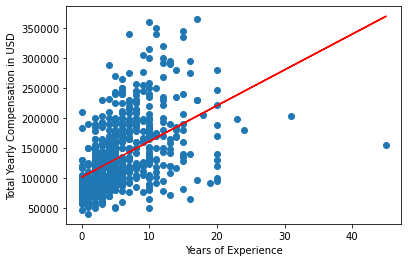

The slope is [5931.63329456]
The intercept is 102119.54822474474
The correlation coefficient is 0.4934131027089477


In [133]:
#regression for business analysts total pay
simple_regression(business_analyst_df)

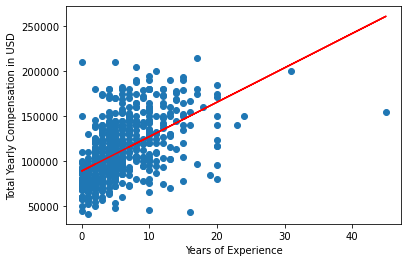

The slope is [3835.2902419]
The intercept is 88831.04591991761
The correlation coefficient is 0.5400937015702421


(939       7.0
 1001     10.0
 3170     10.0
 3728      4.0
 4873      4.0
          ... 
 43908     0.0
 43988     5.0
 44022     2.0
 44079     4.0
 44117     2.0
 Name: yearsofexperience, Length: 722, dtype: float64,
 939       72000
 1001     100000
 3170     180000
 3728     128000
 4873     100000
           ...  
 43908     44000
 43988    128000
 44022     80000
 44079    110000
 44117    120000
 Name: basesalary, Length: 722, dtype: int64,
 array([115678.0776132 , 127183.94833889, 127183.94833889, 104172.20688751,
        104172.20688751, 100336.91664561, 104172.20688751, 104172.20688751,
        207725.04341874, 108007.49712941,  96501.62640371, 123348.658097  ,
         92666.33616182, 127183.94833889, 123348.658097  , 111842.7873713 ,
         92666.33616182, 111842.7873713 , 119513.3678551 , 104172.20688751,
        104172.20688751, 100336.91664561,  88831.04591992, 127183.94833889,
        108007.49712941,  96501.62640371, 119513.3678551 ,  96501.62640371,
         96501.

In [134]:
#regression for business analysts base pay
simple_regression_base(business_analyst_df)

In [135]:
salaries_df['timestamp']=pd.to_datetime(salaries_df['timestamp'])
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44719,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
44720,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44721,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [136]:
#datetime values seem to bomb the linear regression model, so let's create a new field that is 
#an integer that reflects the order of the dates
#try to create a field that is the number of days from the earliest posted job date
# function found at https://stackoverflow.com/questions/8419564/difference-between-two-dates-in-python
min_date = salaries_df['timestamp'].min()
salaries_df['how_long_posted'] = salaries_df['timestamp']-min_date
def return_days(date_diff):
    days = date_diff.days
    return days
salaries_df['how_long_posted'] = salaries_df['how_long_posted'].apply(return_days)
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country,how_long_posted
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,Redwood City,CA,USA,0
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,San Francisco,CA,USA,3
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,4
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,Mountain View,CA,USA,12
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,459
44719,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,Redmond,WA,USA,462
44720,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,463
44721,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,San Francisco,CA,USA,466


In [137]:
#Try whole dataset with time as the x variable
def simple_regression_time(df):
    # The data in the df column must be reshaped into an array with shape (num_samples, num_features)
    X = df.how_long_posted.values.reshape(-1, 1)
    y = df.basesalary
    # Create a model with scikit-learn
    model = LinearRegression()
    # Fit the data into the model
    model.fit(X, y)
    # The model creates predicted y values based on X values
    y_pred = model.predict(X)
    #corr_coef = np.corrcoef(X,df.basesalary)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel('Days Posted')
    plt.ylabel('Total Yearly Compensation in USD')
    plt.show()
    print(f"The slope is {model.coef_}")
    print(f"The intercept is {model.intercept_}")
    X = df.how_long_posted
    y = df.basesalary
    slope, intercept, r, p, std_err  = stats.linregress(X, y)
    print(f"The correlation coefficient is {r}")

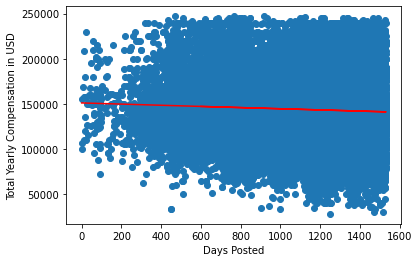

The slope is [-6.44189252]
The intercept is 150955.14158304018
The correlation coefficient is -0.056704590048401365


In [138]:
simple_regression_time(salaries_df)

In [139]:
#try linear model on subsets by company
pd.set_option ('display.max_rows', None)
salaries_df['company'].value_counts()


Amazon                                     5429
Microsoft                                  4195
Google                                     2954
Facebook                                   1761
Apple                                      1558
Oracle                                      800
Intel                                       786
Salesforce                                  769
Capital One                                 748
Cisco                                       705
IBM                                         665
VMware                                      503
Qualcomm                                    499
Uber                                        472
LinkedIn                                    437
Bloomberg                                   426
JPMorgan Chase                              404
Intuit                                      377
Deloitte                                    331
PayPal                                      327
Adobe                                   

In [140]:
pd.set_option ('display.max_rows', 10)
amazon_df = salaries_df.loc[salaries_df['company']=="Amazon"]
amazon_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country,how_long_posted
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,4
13,2017-07-14 21:36:00,Amazon,Software Engineering Manager,287000,12.0,1.0,160000,0.0,0.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,37
14,2017-07-16 16:50:00,Amazon,Software Engineer,218000,10.0,0.0,150000,7000.0,61000.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,39
19,2017-07-31 15:54:00,Amazon,Software Engineer,300000,12.0,12.0,158000,142000.0,0.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,54
25,2017-08-08 05:54:00,Amazon,Software Engineering Manager,205000,12.0,7.0,138000,67000.0,0.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44693,2018-08-04 11:47:00,Amazon,Software Engineer,135000,1.0,0.0,104000,3000.0,18500.0,Male,...,0,0,0,0,0,0,Seattle,WA,USA,423
44695,2018-08-07 21:07:00,Amazon,Software Engineer,152000,3.0,0.0,106000,26000.0,20000.0,Male,...,0,0,0,0,0,0,Seattle,WA,USA,426
44697,2018-08-10 09:45:00,Amazon,Product Manager,173000,10.0,1.0,145000,15000.0,15000.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,428
44698,2018-08-12 13:49:00,Amazon,Product Manager,181000,9.0,2.0,140000,28000.0,13000.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,431


In [141]:
amazon_df['basesalary'].describe()

count      5429.000000
mean     141093.240376
std       24892.990040
min       35000.000000
25%      125000.000000
50%      144000.000000
75%      155000.000000
max      245000.000000
Name: basesalary, dtype: float64

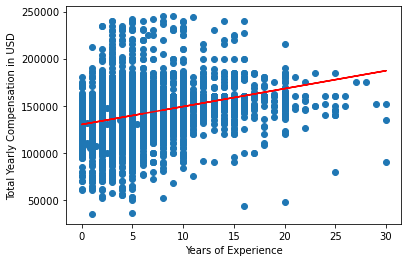

The slope is [1903.42696934]
The intercept is 130039.02426617543
The correlation coefficient is 0.37537994280921644


In [142]:
amazon_x, amazon_y, amazon_ypred, amazon_slope, amazon_intercept = simple_regression_base(amazon_df)

In [143]:
amazon_slope

1903.426969337332

In [144]:
microsoft_df = salaries_df.loc[salaries_df['company']=="Microsoft"]
microsoft_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country,how_long_posted
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,Mountain View,CA,USA,12
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,14
5,2017-06-22 12:37:00,Microsoft,Software Engineering Manager,300000,15.0,11.0,180000,65000.0,55000.0,none,...,0,0,0,0,0,0,Redmond,WA,USA,15
6,2017-06-22 13:55:00,Microsoft,Software Engineer,156000,4.0,4.0,135000,8000.0,13000.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,15
7,2017-06-22 23:08:00,Microsoft,Software Engineer,120000,3.0,1.0,120000,0.0,0.0,none,...,0,0,0,0,0,0,Redmond,WA,USA,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44708,2018-08-22 16:35:00,Microsoft,Software Engineer,122000,1.0,0.0,106500,20000.0,10000.0,none,...,0,0,0,0,0,0,Redmond,WA,USA,441
44710,2018-08-26 09:59:00,Microsoft,Product Manager,171000,1.0,1.0,116000,42850.0,12500.0,none,...,0,0,0,0,0,0,Bellevue,WA,USA,444
44711,2018-08-28 00:25:00,Microsoft,Software Engineer,132000,0.0,0.0,108000,17500.0,6250.0,none,...,0,0,0,0,0,0,Redmond,WA,USA,446
44712,2018-08-28 21:38:00,Microsoft,Software Engineering Manager,250000,7.0,7.0,180000,25000.0,45000.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,447


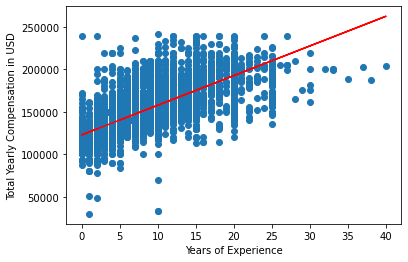

The slope is [3492.12412254]
The intercept is 122996.3840904702
The correlation coefficient is 0.726840324042894


In [145]:
ms_x, ms_y, ms_ypred, ms_slope, ms_intercept = simple_regression_base(microsoft_df)

In [146]:
google_df = salaries_df.loc[salaries_df['company']=="Google"]
google_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country,how_long_posted
24,2017-08-07 02:08:00,Google,Software Engineer,300000,8.0,4.0,155000,112000.0,33000.0,none,...,0,0,0,0,0,0,Mountain View,CA,USA,60
62,2017-10-25 10:30:00,Google,Software Engineer,275000,4.0,0.0,160000,91000.0,24000.0,none,...,0,0,0,0,0,0,Mountain View,CA,USA,139
67,2017-11-14 20:39:00,Google,Software Engineer,158000,0.0,0.0,116000,25000.0,17000.0,none,...,0,0,0,0,0,0,Mountain View,CA,USA,160
69,2017-11-16 18:40:00,Google,Software Engineer,273000,1.0,1.0,131000,112000.0,30000.0,none,...,0,0,0,0,0,0,Sunnyvale,CA,USA,162
71,2017-11-20 14:46:00,Google,Software Engineer,268000,5.0,3.5,142000,100000.0,26000.0,none,...,0,0,0,0,0,0,Mountain View,CA,USA,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44689,2018-08-01 01:25:00,Google,Software Engineer,238000,2.0,0.0,131000,87500.0,19650.0,Male,...,0,0,0,0,0,0,Seattle,WA,USA,419
44690,2018-08-01 19:35:00,Google,Software Engineer,220000,2.0,0.0,140000,40000.0,28000.0,Male,...,0,0,0,0,0,0,San Bruno,CA,USA,420
44703,2018-08-15 20:18:00,Google,Software Engineer,215000,2.0,2.0,132000,55000.0,23000.0,none,...,0,0,0,0,0,0,Mountain View,CA,USA,434
44709,2018-08-23 14:04:00,Google,Software Engineer,169000,0.0,0.0,125000,25000.0,18750.0,none,...,0,0,0,0,0,0,San Bruno,CA,USA,442


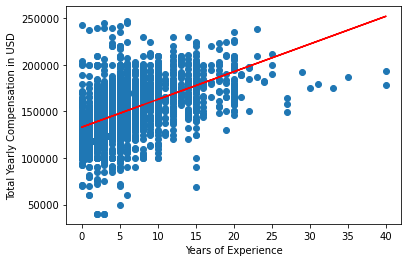

The slope is [2977.60000892]
The intercept is 133111.62676324398
The correlation coefficient is 0.5188586354163144


In [147]:
google_x, google_y, google_ypred, google_slope, google_intercept = simple_regression_base(google_df)

In [148]:
facebook_df = salaries_df.loc[salaries_df['company']=="Facebook"]
facebook_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country,how_long_posted
15,2017-07-20 22:35:00,Facebook,Software Engineer,168000,1.0,1.0,168000,0.0,0.0,none,...,0,0,0,0,0,0,Menlo Park,CA,USA,43
37,2017-09-04 14:17:00,Facebook,Software Engineer,190000,1.0,1.0,140000,150000.0,14000.0,none,...,0,0,0,0,0,0,Menlo Park,CA,USA,89
116,2018-02-15 18:02:00,Facebook,Software Engineer,155000,0.0,0.0,107000,38000.0,11000.0,none,...,0,0,0,0,0,0,Menlo Park,CA,USA,253
122,2018-02-20 10:58:00,Facebook,Software Engineer,200000,1.0,0.0,200000,0.0,0.0,none,...,0,0,0,0,0,0,Menlo Park,CA,USA,257
287,2018-06-05 14:48:00,Facebook,Software Engineer,270000,3.5,0.0,160000,90000.0,20000.0,Male,...,0,0,0,0,0,0,San Francisco,CA,USA,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44520,2018-02-01 09:11:00,Facebook,Software Engineer,380000,5.0,0.0,180000,150000.0,25000.0,none,...,0,0,0,0,0,0,Menlo Park,CA,USA,238
44573,2018-05-09 07:47:00,Facebook,Software Engineer,275000,3.0,3.0,157000,101000.0,15700.0,Male,...,0,0,0,0,0,0,New York,NY,USA,335
44601,2018-05-23 17:42:00,Facebook,Software Engineer,160000,1.0,1.0,124000,145000.0,23000.0,Male,...,0,0,0,0,0,0,Menlo Park,CA,USA,350
44620,2018-06-04 20:28:00,Facebook,Software Engineer,165000,1.0,1.0,114000,37500.0,11400.0,Male,...,0,0,0,0,0,0,Seattle,WA,USA,362


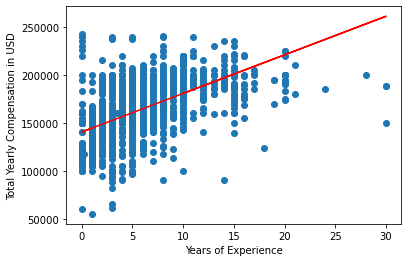

The slope is [4024.49085332]
The intercept is 140405.149243547
The correlation coefficient is 0.585729997841678


In [149]:
fb_x, fb_y, fb_ypred, fb_slope, fb_intercept = simple_regression_base(facebook_df)

In [150]:
apple_df = salaries_df.loc[salaries_df['company']=="Apple"]
apple_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country,how_long_posted
22,2017-08-06 22:23:00,Apple,Software Engineer,200000,3.0,2.0,140000,40000.0,20000.0,none,...,0,0,0,0,0,0,Cupertino,CA,USA,60
26,2017-08-10 18:05:00,Apple,Software Engineer,120000,5.0,2.0,95000,80000.0,8000.0,none,...,0,0,0,0,0,0,Cupertino,CA,USA,64
29,2017-08-18 21:57:00,Apple,Software Engineer,200000,7.0,0.0,200000,0.0,0.0,none,...,0,0,0,0,0,0,Cupertino,CA,USA,72
40,2017-09-07 15:55:00,Apple,Software Engineer,150000,3.0,3.0,150000,0.0,0.0,none,...,0,0,0,0,0,0,Cupertino,CA,USA,92
52,2017-09-11 13:51:00,Apple,Software Engineer,210000,3.0,2.0,130000,50000.0,30000.0,none,...,0,0,0,0,0,0,Cupertino,CA,USA,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44550,2018-04-04 23:01:00,Apple,Software Engineer,270000,8.0,3.0,160000,80000.0,30000.0,none,...,0,0,0,0,0,0,Cupertino,CA,USA,301
44591,2018-05-19 15:32:00,Apple,Software Engineer,163000,4.0,0.0,120000,90000.0,20000.0,Male,...,0,0,0,0,0,0,Cupertino,CA,USA,346
44623,2018-06-05 14:40:00,Apple,Software Engineer,152500,0.0,0.0,115000,70000.0,20000.0,Male,...,0,0,0,0,0,0,Cupertino,CA,USA,363
44633,2018-06-14 08:49:00,Apple,Software Engineer,152000,0.0,0.0,120000,50000.0,20000.0,Female,...,0,0,0,0,0,0,Cupertino,CA,USA,371


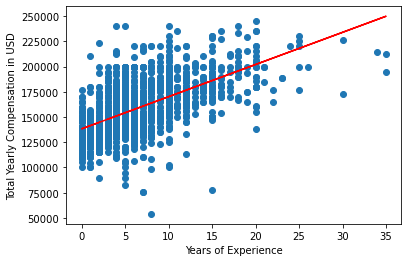

The slope is [3187.42993661]
The intercept is 138302.56440980232
The correlation coefficient is 0.5992128919532005


In [151]:
apple_x, apple_y, apple_ypred, apple_slope, apple_intercept = simple_regression_base(apple_df)

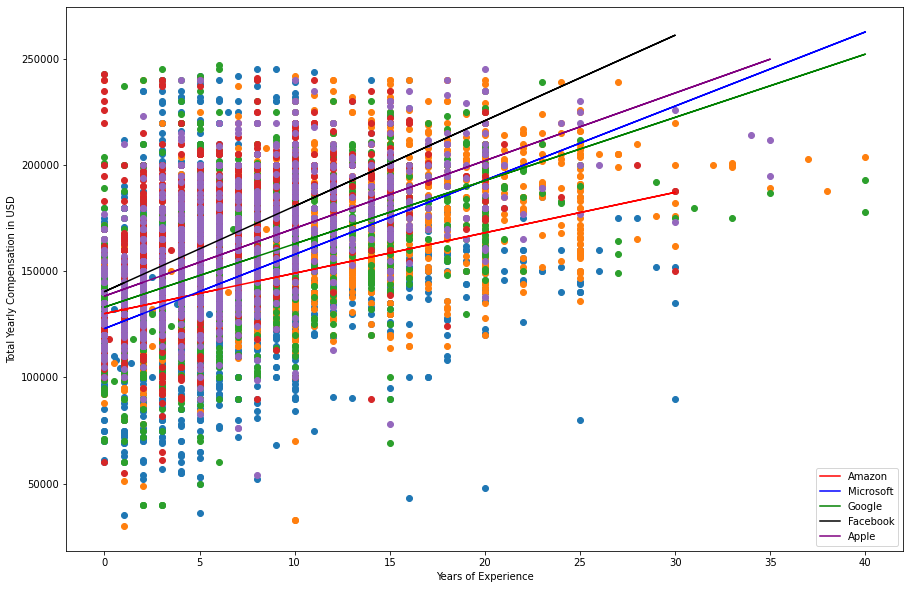

In [164]:
#Combine 5 top companies in one scatter and line of best fit graph
plt.figure(figsize = (15,10))
plt.scatter(amazon_x, amazon_y)
plt.plot(amazon_x, amazon_ypred, color='red',label="Amazon")
plt.xlabel('Years of Experience')
plt.ylabel('Total Yearly Compensation in USD')
plt.scatter(ms_x,ms_y)
plt.plot(ms_x,ms_ypred,color='blue',label="Microsoft")
plt.scatter(google_x,google_y)
plt.plot(google_x,google_ypred,color='green',label = "Google")
plt.scatter(fb_x,fb_y)
plt.plot(fb_x,fb_ypred,color='black',label="Facebook")
plt.scatter(apple_x,apple_y)
plt.plot(apple_x,apple_ypred,color='purple',label = "Apple")
plt.legend()
plt.savefig("Resources/top_5.png")
plt.show()